In [1]:
import cv2 as cv
import numpy as np
import pandas as pd

import tensorflow as tf
import matplotlib.pyplot as plt

In [6]:
train_set=pd.read_csv('mnist_train.csv').values #splitting the data into training and testing datasets
test_set=pd.read_csv('mnist_test.csv').values

In [3]:
train_set.head()      #dataframe format

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
train_set.shape

(60000, 785)

In [7]:
x_train=train_set[:,1:]
y_train=train_set[:,:1]

x_train=np.reshape(x_train, (60000,28,28,1))

x_train=x_train/255.

In [8]:
x_test=test_set[:,1:]
y_test=test_set[:,:1]

x_test=np.reshape(x_test, (10000,28,28,1))

x_test=x_test/255.

In [9]:
x_train.shape

(60000, 28, 28, 1)

In [10]:
x_test.shape #10000 images for testing

(10000, 28, 28, 1)

In [11]:
y_train.shape

(60000, 1)

In [12]:
y_test.shape #10000 images for predicition

(10000, 1)

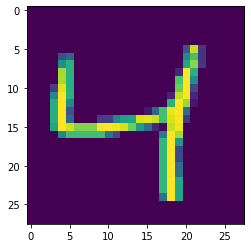

In [13]:
plt.imshow(x_train[2])

In [20]:
test_set.shape

(10000, 785)

# CNN Architecture Building

In [14]:
from keras.models import Sequential
from keras.layers import Dense,Conv2D,Dropout,Flatten,MaxPooling2D

In [15]:
model = Sequential()

model.add(Conv2D(28, kernel_size=(3,3), input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128,activation = tf.nn.relu))
model.add(Dropout(0.2))

model.add(Dense(10, activation = tf.nn.softmax))

model.compile(optimizer= 'adam',loss='sparse_categorical_crossentropy',metrics=['accuracy']) #compiling and fitting the model

In [9]:
model.fit(x= x_train, y=y_train, epochs=7)

Epoch 1/7
1875/1875 [==============================] - 54s 25ms/step - loss: 0.2054 - accuracy: 0.9388
Epoch 2/7
1875/1875 [==============================] - 49s 26ms/step - loss: 0.0827 - accuracy: 0.9753
Epoch 3/7
1875/1875 [==============================] - 51s 27ms/step - loss: 0.0588 - accuracy: 0.9819
Epoch 4/7
1875/1875 [==============================] - 54s 29ms/step - loss: 0.0431 - accuracy: 0.9856
Epoch 5/7
1875/1875 [==============================] - 53s 28ms/step - loss: 0.0359 - accuracy: 0.9880
Epoch 6/7
1875/1875 [==============================] - 53s 28ms/step - loss: 0.0304 - accuracy: 0.9900
Epoch 7/7
1875/1875 [==============================] - 55s 29ms/step - loss: 0.0235 - accuracy: 0.9920


In [10]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 5s 11ms/step - loss: 0.0577 - accuracy: 0.9837


[0.0577484630048275, 0.9836999773979187]

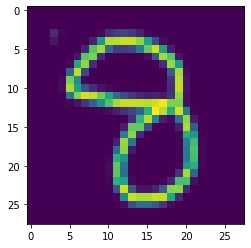

In [16]:
img=cv.imread('eight.png')
gray=cv.cvtColor(img,cv.COLOR_BGR2GRAY)

gray = gray/255.
gray =1. - gray

gray = cv.resize(gray, (28,28))

plt.imshow(gray)
plt.show()
gray=np.reshape(gray, (1,28,28,1))

np.argmax(model.predict(gray))
result = model.predict(gray)

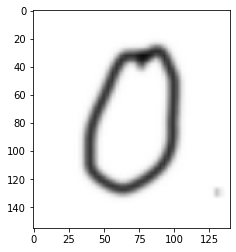

In [20]:
plt.imshow(img)

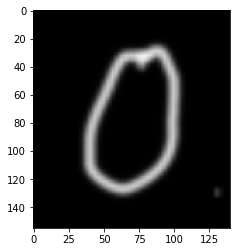

In [25]:
plt.imshow(img)

In [21]:
temp_img=np.reshape(train_set[0][1:], (28,28))

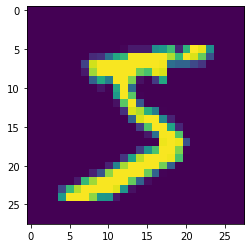

In [22]:
plt.imshow(temp_img)

In [65]:
(x_train,y_traint),(x_test,y_test)=tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 3s 0us/step


# Save Model/Weights

In [68]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 28)        280       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 28)        0         
_________________________________________________________________
flatten (Flatten)            (None, 4732)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               605824    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 607,394
Trainable params: 607,394
Non-trainable params: 0
__________________________________________________

In [69]:
model.save('CNN_7Epoch.mdl')

INFO:tensorflow:Assets written to: CNN_7Epoch.mdl\assets
